In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('titanic_toy.csv')

In [14]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [15]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.2,random_state=42)

In [20]:
xtrain.isnull().sum()

Age       140
Fare       36
Family      0
dtype: int64

In [23]:
age_mean=xtrain['Age'].mean()
age_median=xtrain['Age'].median()
fare_mean=xtrain['Fare'].mean()
fare_median=xtrain['Fare'].median()

In [27]:
age_mean_col=xtrain['Age'].fillna(age_mean)
age_median_col=xtrain['Age'].fillna(age_median)
fare_median_col=xtrain['Fare'].fillna(fare_median)
fare_mean_col=xtrain['Fare'].fillna(fare_mean)

In [28]:
import seaborn as sns

Text(0.5, 1.0, 'filling missing value of age')

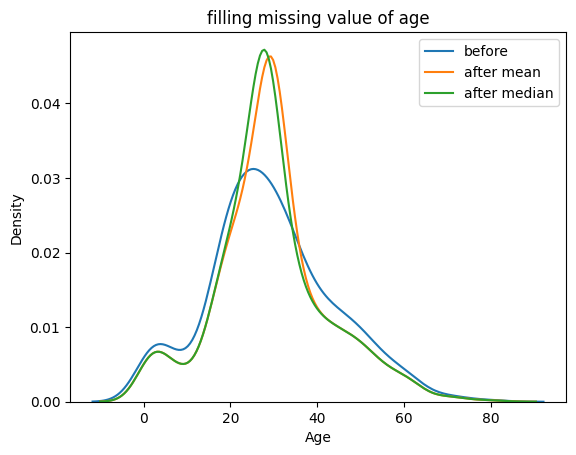

In [34]:
sns.kdeplot(xtrain['Age'],label='before')
sns.kdeplot(age_mean_col,label='after mean')
sns.kdeplot(age_median_col,label='after median')
plt.legend()
plt.title('filling missing value of age')
### we can see that it is not good  to fill missing value of age with mean

Text(0.5, 1.0, 'filling missing value of fare')

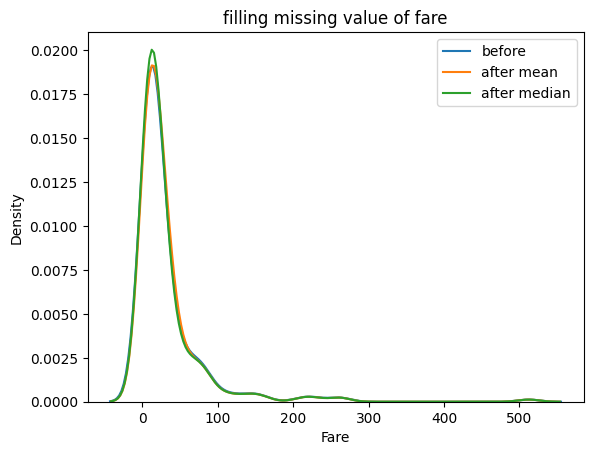

In [36]:
sns.kdeplot(xtrain['Fare'],label='before')
sns.kdeplot(fare_mean_col,label='after mean')
sns.kdeplot(fare_median_col,label='after median')
plt.legend()
plt.title('filling missing value of fare')
### we can see that it is  good  to fill missing value of fare with mean

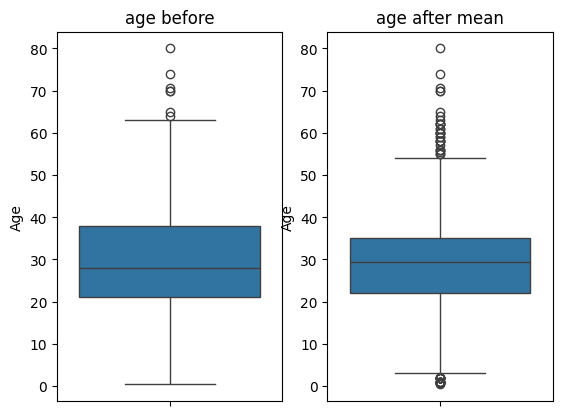

In [38]:
plt.subplot(1,2,1)
sns.boxplot(xtrain['Age'])
plt.title("age before")

plt.subplot(1,2,2)
sns.boxplot(age_mean_col)
plt.title("age after mean")
plt.show()
## more number of outlires


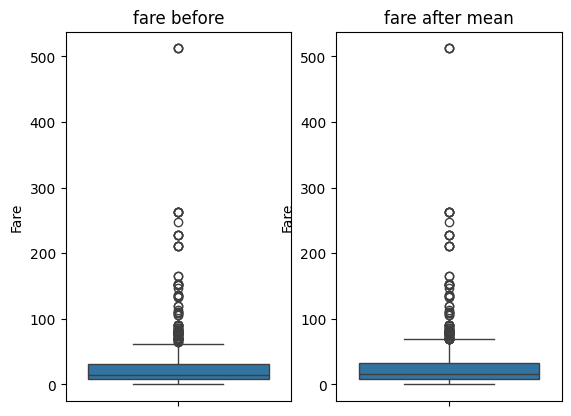

In [40]:
plt.subplot(1,2,1)
sns.boxplot(xtrain['Fare'])
plt.title("fare before")

plt.subplot(1,2,2)
sns.boxplot(fare_mean_col)
plt.title("fare after mean")
plt.show()
## outlires remian same becuse destrubution is not comparable

## using Sklearn for arbitary value imputation ##

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [68]:
t1=ColumnTransformer(transformers=[
     ('imp1',SimpleImputer(strategy='constant',fill_value=100),['Age']),
    ('imp2',SimpleImputer(strategy='constant',fill_value=1000),['Fare']),
    
],remainder='passthrough')
xtrain

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6
...,...,...,...
106,21.0,7.6500,0
270,NaN,31.0000,0
860,41.0,NaN,2
435,14.0,120.0000,3


In [69]:
t1.fit(xtrain)

C:\Users\bhatt\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imp1',
                                 SimpleImputer(fill_value=100,
                                               strategy='constant'),
                                 ['Age']),
                                ('imp2',
                                 SimpleImputer(fill_value=1000,
                                               strategy='constant'),
                                 ['Fare'])])

In [70]:
t1.named_transformers_['imp1'].statistics_

array([100.])

In [71]:
xtrain_filled=t1.transform(xtrain)
xtst_filled=t1.transform(xtest)
xtrain_filled

array([[  45.5   ,   28.5   ,    0.    ],
       [  23.    ,   13.    ,    0.    ],
       [  32.    ,    7.925 ,    0.    ],
       ...,
       [  41.    , 1000.    ,    2.    ],
       [  14.    ,  120.    ,    3.    ],
       [  21.    ,   77.2875,    1.    ]])

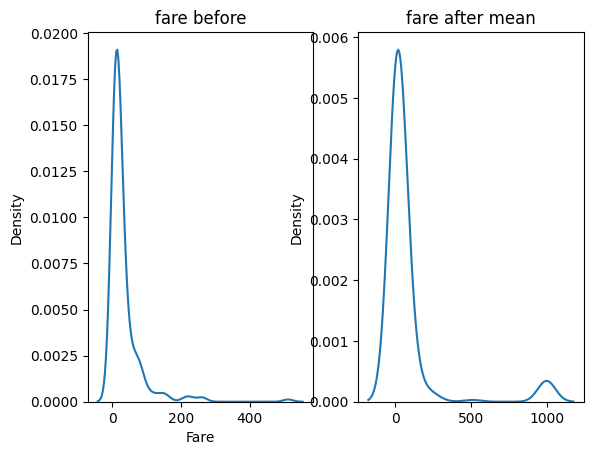

In [72]:
plt.subplot(1,2,1)
sns.kdeplot(xtrain['Fare'])
plt.title("fare before")

plt.subplot(1,2,2)
sns.kdeplot(xtrain_filled[:,1])
plt.title("fare after mean")
plt.show()

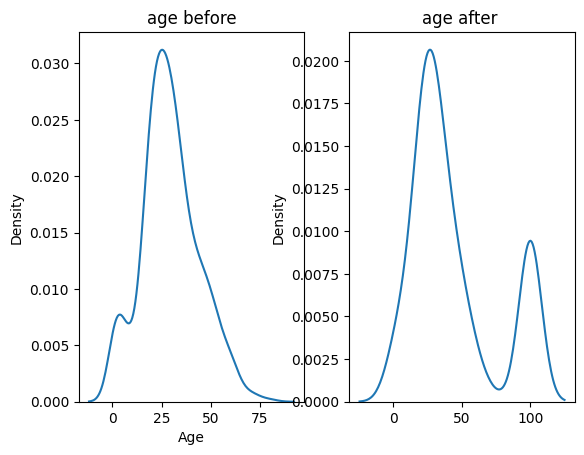

In [73]:
plt.subplot(1,2,1)
sns.kdeplot(xtrain['Age'])
plt.title("age before")

plt.subplot(1,2,2)
sns.kdeplot(xtrain_filled[:,0])
plt.title("age after ")
plt.show()